In [5]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

directory = 'deepseekcoder6.7/'

models = ["evaluation_compareeval_deepseek-coder-6-7b-instruct", "evaluation_compareeval_deepseek-coder-explain-6-7b-instruct", "evaluation_compareeval_deepseek-coder-compare-6-7b-instruct"]
file_names = []
for model in models:
    file_names.append(model)
print(file_names)

['evaluation_compareeval_deepseek-coder-6-7b-instruct', 'evaluation_compareeval_deepseek-coder-explain-6-7b-instruct', 'evaluation_compareeval_deepseek-coder-compare-6-7b-instruct']


In [6]:
conala = []
for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
            
            # Extract the "bleu" value
            try:
                bleu = data.get('conala', {}).get('bleu')
                if bleu is not None:
                    print(f"{file_name}: bleu = {bleu}")
                    conala.append(bleu)
                else:
                    print(f"{file_name}: 'bleu' key not found.")
            except json.JSONDecodeError:
                print(f"{file_name}: Error decoding JSON.")
    else:
        print(f"{file_name}: File not found.")
        
print(conala)

evaluation_compareeval_deepseek-coder-6-7b-instruct: 'bleu' key not found.
evaluation_compareeval_deepseek-coder-explain-6-7b-instruct: 'bleu' key not found.
evaluation_compareeval_deepseek-coder-compare-6-7b-instruct: 'bleu' key not found.
[]


In [7]:
compareeval = []
for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
            
            # Extract the "bleu" value
            try:
                bleu = data.get('compareeval', {}).get('bleu')
                if bleu is not None:
                    print(f"{file_name}: bleu = {bleu}")
                    conala.append(bleu)
                else:
                    print(f"{file_name}: 'bleu' key not found.")
            except json.JSONDecodeError:
                print(f"{file_name}: Error decoding JSON.")
    else:
        print(f"{file_name}: File not found.")
        
print(compareeval)

evaluation_compareeval_deepseek-coder-6-7b-instruct: bleu = 0.0015692343654923782
evaluation_compareeval_deepseek-coder-explain-6-7b-instruct: bleu = 0.002921401491969391
evaluation_compareeval_deepseek-coder-compare-6-7b-instruct: bleu = 0.004872394639797667
[]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (0,).

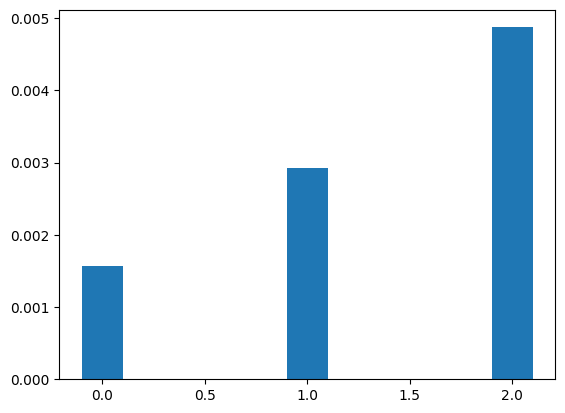

In [8]:
import matplotlib.pyplot as plt
import numpy as np

data1 = conala
data2 = compareeval

data = [data1, data2]

n_models = len(models)
n_categories = len(data)

bar_width = 0.2

r = np.arange(n_models)

fig, ax = plt.subplots()

for i in range(n_categories):
    ax.bar(r + i * bar_width, data[i], width=bar_width, label=f'Category {i+1}')

ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Bar Plot with Multiple Bars for Each Model')
ax.set_xticks(r + bar_width * (n_categories - 1) / 2)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.show()